<div align="left">
<img src="https://www.udea.edu.co/wps/wcm/connect/udea/99fc43e7-7a64-45bd-97fc-96639b70813d/logosimbolo-vertical.png?MOD=AJPERES&CVID=ljeLvHr" width="100" height="130" align="left" style="margin-right: 50px">
</div>

# Computational Methods exams

Exam 00

<div align="right" style="width: 99.5%;">
Estiven Castrillon
</div>

<div style="width: 99.5%; border-bottom: 3px solid white;"></div>

#Quiz #1

-Conceptos básicos

-Equaciones de una Variable

Todos sus códigos debidamente comentados.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('Solarize_Light2')

**1** Implemente un algoritmo en Python que le permita decir si un número **n** es perfecto.

**Nota** Un número perfecto es un número entero positivo que es igual a la suma de sus divisores propios positivos.

Ejemplo:  
28 = 1 + 2 + 4 + 7 + 14

496 = 1 + 2 + 4 + 8 + 16 + 31 + 62 + 124 + 248


In [2]:
def perfecto(numero: int) -> bool:
    divisores = [i for i in range(1, numero) if (numero % i == 0)] # divisores del número
    if numero == sum(divisores): # si el numero es igual a la suma de sus divisores
        return True
    else:
        return False

numeros = [28, 496]
for numero in numeros:
    print(f'¿El número {numero} es perecto?: {perfecto(numero)}')

¿El número 28 es perecto?: True
¿El número 496 es perecto?: True


 **2** Es sabido que en el movimiento amortiguado la energía disminuye con el tiempo debido a una fuerza disipativa proporcional a la velocidad, la constante de proporcionalidad es $b$ kg/s, , pero si se introduce una fuerza restauradora $F_0$ N, el movimiento vuelve a tener mas oscilaciones y se puede mostrar que es gobernado por la ecuación:

$$E(\omega)=\frac{F_0/m}{\sqrt{(\omega^2-\omega_0^2)^2+\left(\frac{b\omega}{m}\right)^2 }} \cos⁡(\omega t+\delta)$$

**a)** Haga variaciones de $F_0$ y $b$ para que evalue su compartamiento (almenos tres graficas)

**b)** Construya y grafique la función $E(\omega)$ ¿cuántas raíces hay? Considere $t=2$ s, m, $m=0.2$ kg, $\delta=0.0$,  $\omega_0=2.4$ Hz,$F_0=1$N y $b=5$kg/s, (use `ω = np.arange(0, 20, 0.001)`).

**c)** Con el método de la secante, calcule las dos primeras frecuencia $\omega$ que hacen que $E(ω)=0$

**d)** Con punto fijo y usando un $p_0$ de su elección, ¿Cuántas iteraciones son necesarias para hallar la primera frecuencia con un error menor que $10^{-8}$?

**a)** Haga variaciones de $F_0$ y $b$ para que evalue su compartamiento (almenos tres graficas)

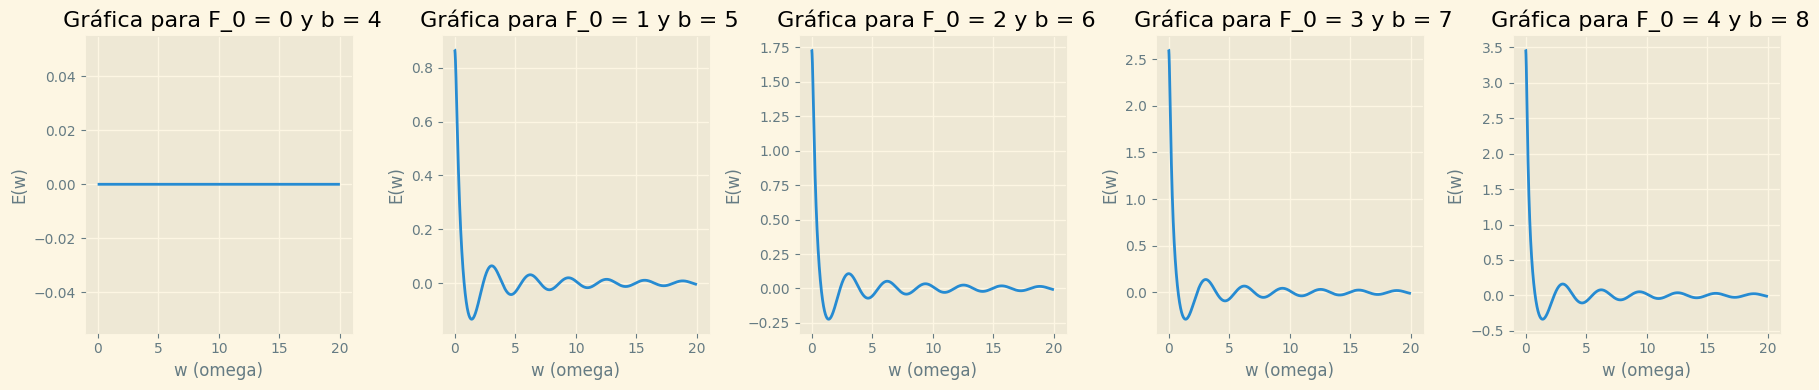

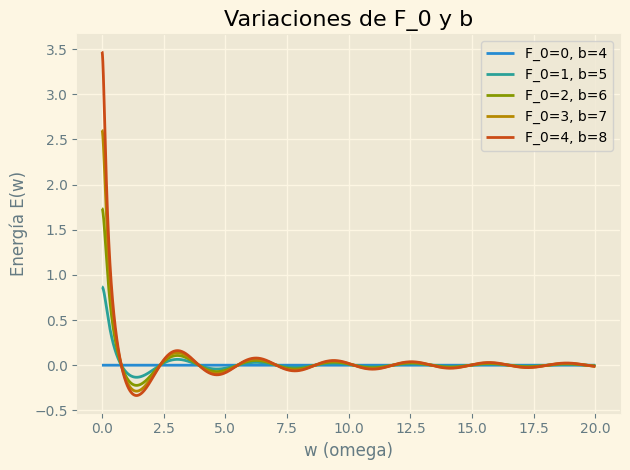

In [3]:
def movimiento_amort(w, w_0, F_0, m, b, delta, t) -> float:
    movimiento = ((F_0 / m) * (np.cos(w * t + delta))) / (np.sqrt((w**2 - w_0**2)**2 + ((b * w)/m)**2))
    return movimiento

# Definición de valores a usar
t = 2
m = 0.2
delta = 0
w_0 = 2.4
F_0 = 1
b = 5
w = np.arange(0, 20, 0.001)

# a) Variaciones de F_0 y b
valores_F_0, valores_b = [i for i in range(5)], [p for p in range(4, 10)]

fig, axs = plt.subplots(1, 5, figsize=(18, 4))
for i in range(0, 5):
    f_variado, b_variado = valores_F_0[i], valores_b[i]
    puntos_grafica = movimiento_amort(w, w_0, f_variado, m, b_variado, delta, t)
    axs[i].plot(w, puntos_grafica)
    axs[i].set_title(f' Gráfica para F_0 = {f_variado} y b = {b_variado}')
    axs[i].set_ylabel('E(w)')
    axs[i].set_xlabel('w (omega)')

plt.tight_layout()
plt.show()

# Variación de la gráfica
for f_variado, b_variado in zip(valores_F_0, valores_b):
    puntos_grafica = movimiento_amort(w, w_0, f_variado, m, b_variado, delta, t)
    plt.plot(w, puntos_grafica, label=f'F_0={f_variado}, b={b_variado}')
    plt.title('Variaciones de F_0 y b')
    plt.xlabel('w (omega)')
    plt.ylabel('Energía E(w)')
    plt.legend()

plt.tight_layout()
plt.show()

**b)** Construya y grafique la función $E(\omega)$ ¿cuántas raíces hay? Considere $t=2$ s, m, $m=0.2$ kg, $\delta=0.0$,  $\omega_0=2.4$ Hz,$F_0=1$N y $b=5$kg/s, (use `ω = np.arange(0, 20, 0.001)`).

Respuesta: en el rango de omega dado, hay 13 raíces, es decir, 13 veces en que la función se hace cero.

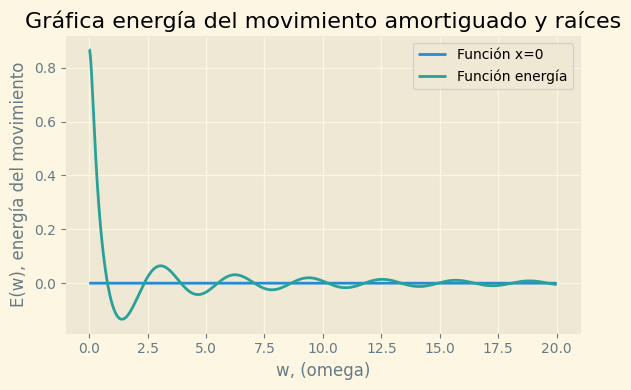

In [4]:
# b) Gráfica de la función

# Definición de valores a usar
t = 2
m = 0.2
delta = 0
w_0 = 2.4
F_0 = 1
b = 5
w = np.arange(0, 20, 0.001)

funcion = movimiento_amort(w, w_0, F_0, m, b, delta, t)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
plt.plot(w, np.repeat(0, len(w)), label='Función x=0', )
ax.plot(w, funcion, label='Función energía')
ax.set_xlabel('w, (omega)')
ax.set_ylabel('E(w), energía del movimiento')
ax.set_title('Gráfica energía del movimiento amortiguado y raíces')
ax.legend()
plt.tight_layout()
plt.show()

**c)** Con el método de la secante, calcule las dos primeras frecuencia $\omega$ que hacen que $E(ω)=0$

In [5]:

def Secante(f,p0,p1,eps=1e-8, Nmax = 100) -> tuple:
   q0 = f(p0)
   q1 = f(p1)
   i = 2
   while i<Nmax:
      p = p1 - q1*(p1 - p0)/(q1 - q0)

      if ( np.abs(p - p1) < eps ): break
      i = i + 1

      p0 = p1
      q0 = q1
      p1 = p
      q1 = f(p)

      if (i == Nmax): print ("el método fallo")
   return (p, i)

def movimiento_amortiguado(w) -> float:
    w_0, F_0, m, b, delta, t = 2.4, 1, 0.2, 5, 0, 2
    movimiento = ((F_0 / m) * (np.cos(w * t + delta))) / (np.sqrt((w**2 - w_0**2)**2 + ((b * w)/m)**2))
    return movimiento

# w = np.arange(0, 20, 0.001)
raiz1 = Secante(movimiento_amortiguado, 0, 1)[0]
raiz2 = Secante(movimiento_amortiguado, 0, 2)[0]
print(f'El valor donde se da la raíz 1 es {raiz1} y el valor de la función es {movimiento_amortiguado(raiz1)}')
print(f'El valor donde se da la raíz 2 es {raiz2} y el valor de la función es {movimiento_amortiguado(raiz2)}')
print('Ambos valores son casi cero')

El valor donde se da la raíz 1 es 0.7853981633974514 y el valor de la función es -1.5164563777193026e-15
El valor donde se da la raíz 2 es 2.3561944901923546 y el valor de la función es 1.6429974025713502e-15
Ambos valores son casi cero
